## All about PCA 

PCA - It is used to reduce high-dimensional vector to lower dimension with the help of Eigen vectors and Eigen Values. An explanation from ChatGPT is as follows -

The idea behind PCA is to identify a set of new variables, called principal components, that are linear combinations of the original features, and which capture most of the variance in the data. The principal components are ordered in such a way that the first component captures the most variance, the second component captures the second most variance, and so on. By selecting only the top k principal components, where k is a smaller number than the original number of features, we can represent the data in a lower-dimensional space while still retaining most of the information.

In [1]:
# Import libraries
import numpy as np

In [2]:
# Lets build Dummy data having high dimensions
data = np.random.rand(100,50)

In [63]:
print(data)

[[0.51211109 0.84061583 0.27782804 ... 0.76590516 0.30770805 0.98221368]
 [0.53030138 0.53324388 0.11714409 ... 0.91881651 0.73258078 0.33685239]
 [0.16501592 0.96707466 0.428436   ... 0.53440471 0.29381953 0.13234198]
 ...
 [0.71400756 0.85594975 0.14091552 ... 0.42576469 0.50605266 0.66669827]
 [0.87188671 0.87728914 0.70617221 ... 0.93724362 0.85995841 0.11533538]
 [0.31704343 0.93906419 0.60993351 ... 0.53253049 0.2712701  0.56971888]]


In [4]:
# Here data has a shape of 100 rows and 50 columns. 
data.shape

(100, 50)

We will try to build a covariance matrix out of it after standardizing it. We will find the mean and standard deviation of each column and then use it to standardize the values in the array.

In [34]:
# Lets find the mean at the column level
data_mean = np.mean(data, axis=0)
print(data_mean.shape)

(50,)


In [60]:
# Resizing to match shape of data
data_mean_resized = np.repeat([data_mean], 100, axis=0)
print(data_mean_resized.shape)

(100, 50)


In [64]:
print(data_mean_resized)

[[0.49015008 0.5554031  0.53711165 ... 0.46238787 0.51383677 0.46729075]
 [0.49015008 0.5554031  0.53711165 ... 0.46238787 0.51383677 0.46729075]
 [0.49015008 0.5554031  0.53711165 ... 0.46238787 0.51383677 0.46729075]
 ...
 [0.49015008 0.5554031  0.53711165 ... 0.46238787 0.51383677 0.46729075]
 [0.49015008 0.5554031  0.53711165 ... 0.46238787 0.51383677 0.46729075]
 [0.49015008 0.5554031  0.53711165 ... 0.46238787 0.51383677 0.46729075]]


In [59]:
# Lets find the standard deviation at the column level and also resize it to match shape of data
data_sd = np.std(data, axis=0)
data_sd_resized = np.repeat([data_sd], [100], axis=0)
print(data_sd_resized.shape)

(100, 50)


In [65]:
print(data_sd_resized)

[[0.30228151 0.29218965 0.29706891 ... 0.29261454 0.30582524 0.29031159]
 [0.30228151 0.29218965 0.29706891 ... 0.29261454 0.30582524 0.29031159]
 [0.30228151 0.29218965 0.29706891 ... 0.29261454 0.30582524 0.29031159]
 ...
 [0.30228151 0.29218965 0.29706891 ... 0.29261454 0.30582524 0.29031159]
 [0.30228151 0.29218965 0.29706891 ... 0.29261454 0.30582524 0.29031159]
 [0.30228151 0.29218965 0.29706891 ... 0.29261454 0.30582524 0.29031159]]


In [61]:
# Now we can do element wise standardization in a memory optimized way
data_std = (data-data_mean_resized)/data_sd_resized

In [93]:
data_std

array([[ 0.07265085,  0.97612194, -0.87280627, ...,  1.03725975,
        -0.67400819,  1.77369054],
       [ 0.13282751, -0.07583848, -1.41370415, ...,  1.55982898,
         0.7152582 , -0.44930469],
       [-1.07560054,  1.40891904, -0.36582638, ...,  0.24611502,
        -0.71942146, -1.15375612],
       ...,
       [ 0.74055961,  1.0286013 , -1.33368422, ..., -0.12515844,
        -0.02545281,  0.68687411],
       [ 1.26285138,  1.10163397,  0.56909544, ...,  1.62280299,
         1.13176284, -1.21233663],
       [-0.57266703,  1.31305505,  0.2451346 , ...,  0.23970996,
        -0.79315452,  0.35282134]])

Below is the alternate way of doing the standardization which is much shorted but less intuitive

In [139]:
data_std = (data-np.mean(data, axis=0))/np.std(data, axis=0)
data_std

array([[ 0.07265085,  0.97612194, -0.87280627, ...,  1.03725975,
        -0.67400819,  1.77369054],
       [ 0.13282751, -0.07583848, -1.41370415, ...,  1.55982898,
         0.7152582 , -0.44930469],
       [-1.07560054,  1.40891904, -0.36582638, ...,  0.24611502,
        -0.71942146, -1.15375612],
       ...,
       [ 0.74055961,  1.0286013 , -1.33368422, ..., -0.12515844,
        -0.02545281,  0.68687411],
       [ 1.26285138,  1.10163397,  0.56909544, ...,  1.62280299,
         1.13176284, -1.21233663],
       [-0.57266703,  1.31305505,  0.2451346 , ...,  0.23970996,
        -0.79315452,  0.35282134]])

Now we have our data standardized and now we can build a covariance matrix out of it


In [69]:
data_cov = np.cov(data_std.T, bias=1)

In [95]:
data_cov.shape

(50, 50)

In [99]:
# Libraries for visualizing 
import seaborn as sns
import matplotlib.pyplot as plt

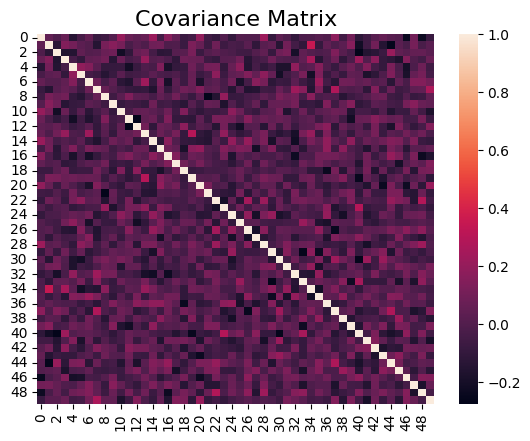

In [101]:
sns.heatmap(data_cov)
plt.title('Covariance Matrix', fontsize=16)
plt.show()

Above heatmap shows how the 50 attributes are related to each other. It can be noted that 

In [75]:
# Import scipy library for calculating Eigen Value and Eigen vector
import scipy.linalg as la

In [126]:
eigen_val, eigen_vector = np.linalg.eig(data_cov)

In [127]:
print(eigen_val)

[2.57321592 2.51207592 2.41055482 2.27451245 2.24790466 2.13727365
 1.95934447 1.89440497 1.79630578 1.75500746 1.67138582 1.56302573
 1.48968664 1.46746728 1.39596928 1.30949302 1.23884813 1.15466717
 1.10054821 1.08958353 0.99573017 0.10276506 0.94336622 0.12442631
 0.16399897 0.18685453 0.19223145 0.20666016 0.22554344 0.26851
 0.27572633 0.29759328 0.88844492 0.8608384  0.81638691 0.34594743
 0.76741798 0.38848083 0.40559865 0.43166183 0.7241213  0.70117613
 0.4905734  0.51409728 0.54552971 0.57711818 0.65283168 0.6468795
 0.60122758 0.61698746]


In [128]:
print(eigen_vector)

[[ 0.15375857  0.21698311  0.04857497 ...  0.32494119 -0.09860001
  -0.12776814]
 [ 0.22271735 -0.01330773  0.0957929  ...  0.04345032 -0.09981732
   0.23804391]
 [-0.07342156  0.15049431 -0.00143794 ...  0.14314331 -0.02285543
  -0.20711245]
 ...
 [ 0.10192884 -0.01235008  0.11747732 ... -0.15229844  0.0958852
  -0.19854798]
 [-0.25605335 -0.21456407  0.18966793 ...  0.14237968 -0.10446685
   0.00594475]
 [ 0.01895052 -0.12415262 -0.16278963 ... -0.23072219  0.23533521
   0.11369991]]


In order to find the most significant components of the eigen vector we need to sort the eigen values in ascending order

In [141]:
idx = eigen_val.argsort()[::-1]
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 32 33
 34 36 40 41 46 47 49 48 45 44 43 42 39 38 37 35 31 30 29 28 27 26 25 24
 23 21]


In [143]:
# Printing the eigen_val sorted in a descending order. This signifies the most significant components
eigen_val[idx]

array([2.57321592, 2.51207592, 2.41055482, 2.27451245, 2.24790466,
       2.13727365, 1.95934447, 1.89440497, 1.79630578, 1.75500746,
       1.67138582, 1.56302573, 1.48968664, 1.46746728, 1.39596928,
       1.30949302, 1.23884813, 1.15466717, 1.10054821, 1.08958353,
       0.99573017, 0.94336622, 0.88844492, 0.8608384 , 0.81638691,
       0.76741798, 0.7241213 , 0.70117613, 0.65283168, 0.6468795 ,
       0.61698746, 0.60122758, 0.57711818, 0.54552971, 0.51409728,
       0.4905734 , 0.43166183, 0.40559865, 0.38848083, 0.34594743,
       0.29759328, 0.27572633, 0.26851   , 0.22554344, 0.20666016,
       0.19223145, 0.18685453, 0.16399897, 0.12442631, 0.10276506])

In [135]:
eigen_val.argsort()[::-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 32, 33, 34, 36, 40, 41, 46, 47, 49, 48, 45, 44,
       43, 42, 39, 38, 37, 35, 31, 30, 29, 28, 27, 26, 25, 24, 23, 21],
      dtype=int64)

In [146]:
eigen_vector_sorted = eigen_vector[:, idx]

Now we will also try to establish the optimal number of principal components that is sufficient to represent the complete dataset. Please note, as our dataset was built using random numbers its likely that there aren't any linear relationship between the variables and hence it won't be a straightforward cutoff number.

In [160]:
variance_explained = []
for i in eigen_val[idx]:
    variance_explained.append((i/sum(eigen_val))*100)
print(variance_explained)

[5.14643184557513, 5.024151835792948, 4.82110964794113, 4.549024895253724, 4.495809316285285, 4.274547306304184, 3.9186889405975465, 3.7888099490939178, 3.5926115635303275, 3.5100149285037756, 3.342771641905577, 3.126051451694458, 2.9793732848247023, 2.934934558079834, 2.7919385527739338, 2.618986047399545, 2.477696266525774, 2.3093343309231247, 2.201096416337749, 2.1791670535787193, 1.9914603456105726, 1.8867324443621731, 1.77688983232492, 1.7216768012209112, 1.6327738118617752, 1.5348359547123722, 1.44824259857018, 1.402352257872892, 1.3056633517311786, 1.2937589905063336, 1.2339749223258918, 1.2024551574324456, 1.1542363551980812, 1.0910594223379537, 1.0281945693048138, 0.9811468045302709, 0.8633236679566176, 0.8111973019107547, 0.7769616585499891, 0.6918948505077636, 0.5951865554276838, 0.5514526648567664, 0.537020005263457, 0.4510868757791539, 0.4133203248953647, 0.3844628963259362, 0.373709064325691, 0.32799794991021786, 0.24885261010581103, 0.20553012136063634]


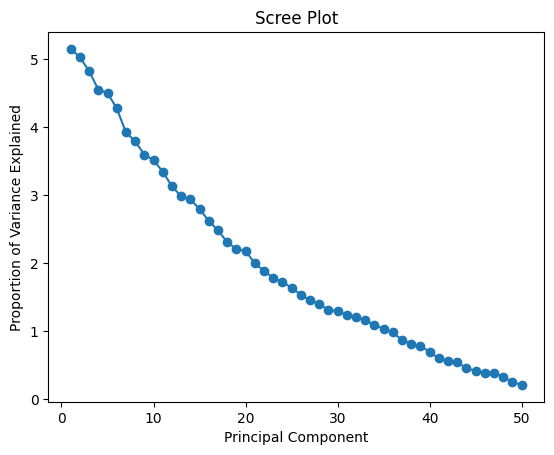

In [163]:
plt.plot(range(1, len(variance_explained)+1), variance_explained, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

From above plot we can see that there's a gradual decrease in the proportion of variance explaind. Though its not a sudden drop but for our convenience we will consider a cut-off at 20

In [164]:
# Calculating n principal components
n_components = 20
data_pca = np.matmul(np.array(data_std),eigen_vector_sorted)

In [170]:
data_pca[:, :n_components]

array([[ 0.32407453, -2.44098505, -0.19800089, ..., -0.11523612,
         0.02970394,  0.25998121],
       [-0.75754778,  0.03870967, -0.7679303 , ...,  0.46232082,
         0.41424602, -1.74598092],
       [ 2.17211264, -0.3944214 , -1.0736974 , ...,  0.6055898 ,
        -1.11353559, -2.14553942],
       ...,
       [ 2.07300063, -0.85509746,  2.30969863, ...,  1.18646649,
        -0.82453643, -0.57316562],
       [-0.8702873 ,  0.62359906,  3.04757927, ..., -0.08706058,
         1.52399153, -0.12180971],
       [ 2.43882699,  0.82850772, -1.90476203, ...,  0.24382762,
         0.58879842, -0.05577699]])

In [171]:
data

array([[0.51211109, 0.84061583, 0.27782804, ..., 0.76590516, 0.30770805,
        0.98221368],
       [0.53030138, 0.53324388, 0.11714409, ..., 0.91881651, 0.73258078,
        0.33685239],
       [0.16501592, 0.96707466, 0.428436  , ..., 0.53440471, 0.29381953,
        0.13234198],
       ...,
       [0.71400756, 0.85594975, 0.14091552, ..., 0.42576469, 0.50605266,
        0.66669827],
       [0.87188671, 0.87728914, 0.70617221, ..., 0.93724362, 0.85995841,
        0.11533538],
       [0.31704343, 0.93906419, 0.60993351, ..., 0.53253049, 0.2712701 ,
        0.56971888]])

However, PCA has some drawbacks to keep in mind. Firstly, it assumes that the data is linearly separable and that the principal components capture the most important aspects of the data. In some cases, this may not be true, and other techniques may be more appropriate. Secondly, PCA may not be suitable for high-dimensional data with a small number of samples, as it can lead to overfitting. Additionally, the interpretation of the principal components can be difficult, especially when the number of components is large. Finally, PCA is a data-driven method that does not incorporate prior knowledge or assumptions about the underlying distribution of the data.